# Pseudo-random number generators
This notebook is an introduction to PRNGs such as those that are used in Monte Carlo (MC) work. These are *pseudo* because it is very difficult to generate true random numbers in a deterministic state machine (i.e. computer). True randomness occurs in some physical processes such as nuclear decay and photon detection among others. You will use this notebook to explore the available methods for generating pseudorandom numbers. We will also compare various methods and determine which are best suited to MC work.

There are three built-in random number generators:
 - native python (load via `import random`)
 - numpy (load via `import numpy.random`)
 - Crypto (load via `import Crypto.Random.random`)
 
and a fourth method called the *linear congruential generator*:
$$x_{n+1} = (a x_n + b) \mod c$$
Where we start with $x_0$ and generate a sequence using specific values of $a$, $b$, and $c$. A certain set of these values was been widely used in the early days of computational physics, it is called *Randu*:
$a = 65539, b = 0, c = 2^{31}$. We'll compare this method to the three listed above and see how random each generator is (and how fast).

In [1]:
import numpy as np

In [2]:
import random as pyrand

In [3]:
import numpy.random as nprand

In [4]:
import Crypto.Random.random as crand

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# Create a convenient function that uses one of these methods to generate an array of random data:
def randarray(N,a=0,b=100,method=pyrand):
    #return np.array([method.randint(a,b) for i in range(N)])
    return np.array([method.random() for i in range(N)])

In [92]:
N=10000

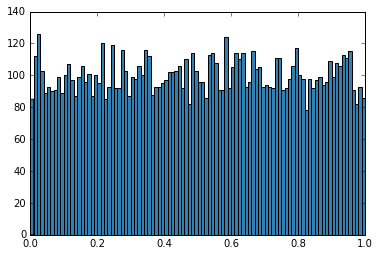

In [94]:
# Generate a random array with the python built-in.
pydata = randarray(N,method=pyrand)

grayblue = (0.2,0.5,0.7)  # a pleasant color

# Create a histogram to check the distribution:
n, bins, patches = plt.hist(pydata, bins=100, facecolor=grayblue)

#print(bins)
#pydata.sort()
#plt.plot(pydata)

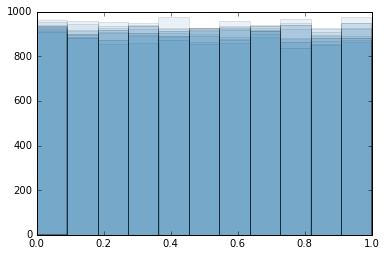

In [95]:
# Even better, do it ten times and plot them all:
for i in range(10):
    pydata = randarray(N,method=pyrand)

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(pydata, bins=11, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

Although the histogram varies each time, it is clear that the average is 100 for each bin.

## Repeat this to generate histograms for the other PRNGs (numpy, and Crypto)

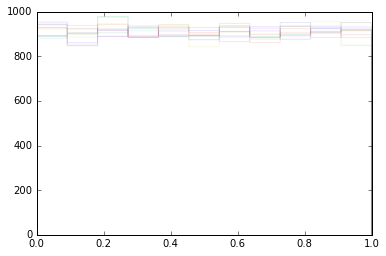

In [96]:
# Solution
for i in range(10):
    npdata = randarray(N,method=nprand)

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(npdata, bins=11, facecolor=grayblue, alpha=0.1,histtype='step')
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

In [97]:
# Solution
for i in range(10):
    cdata = randarray(N,method=crand)

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(cdata, 50, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

AttributeError: module 'Crypto.Random.random' has no attribute 'random'

In [ ]:
# Implement the Randu:
def randu(N,seed=1):
    mydata = []
    x = seed
    for i in range(N):
        x = 65539*x % 2**31
        mydata.append(x)
    return np.array(mydata)

In [ ]:
randudata = randu(N)
randudata = randudata / randudata.max()
#plt.plot(randudata,".-")

In [ ]:
n, bins, patches = plt.hist(randudata, 100, facecolor=grayblue, alpha=0.75)

In [ ]:
## Now check the autocorrelation to see how random it really is:

In [ ]:
from scipy.stats import linregress

In [ ]:
def corrFit(data):
    autocorr = np.correlate(data, data, mode='same')
    N = len(data)
    acorr = autocorr[0:N/2]

    x = range(len(acorr))
    
    plt.plot(acorr)
    regression = linregress(x,acorr)
    plt.plot(x,regression[0]*x + regression[1])
    print(regression)

In [ ]:
corrFit(pydata)

In [ ]:
corrFit(npdata)

In [ ]:
corrFit(cdata)

In [ ]:
corrFit(randudata)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
%matplotlib notebook

In [ ]:
def plot3random(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = data[0:-3:3]
    ys = data[1:-2:3]
    zs = data[2:-1:3]
    ax.scatter(xs, ys, zs)

In [ ]:
plot3random(randudata)

In [ ]:
plot3random(pydata)

In [ ]:
plot3random(cdata)

In [ ]:
plot3random(npdata)